In [1]:
!pip install pandas mlxtend matplotlib kaggle


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!cd C:\Users\Sathvika\AppData\Roaming\Python\Python313\Scripts



In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as pl


In [4]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/Sathvika/Downloads/Groceries_dataset.csv")
df.head()




,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Group items into transactions
transactions = df.groupby(['Member_number','Date'])['itemDescription'].apply(list).tolist()

# Check first few transactions
for i in range(5):
    print(transactions[i])


['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
['whole milk', 'pastry', 'salty snack']
['canned beer', 'misc. beverages']
['sausage', 'hygiene articles']
['soda', 'pickled vegetables']


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # Convert transaction list into basket (True/False for each item)
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Basket format shape:", df.shape)
df.head()


Basket format shape: (14963, 167)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
# Generate rules using lift as metric
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
rules[['antecedents','consequents','support','confidence','lift']].head(10)




,antecedents,consequents,support,confidence,lift


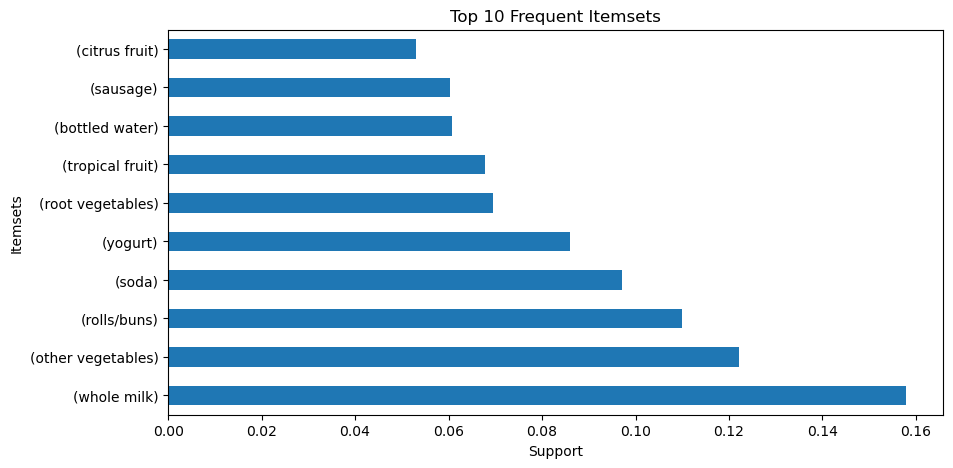

In [20]:
import matplotlib.pyplot as plt
# Plot top 10 frequent itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10).plot(
    x='itemsets', y='support', kind='barh', figsize=(10,5), legend=False
)
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()


In [19]:
# Example: print strong rules where confidence > 0.3 and lift > 1
strong_rules = rules[(rules['confidence'] > 0.8) & (rules['lift'] > 1)]
print("Number of strong rules:", strong_rules.shape[0])
strong_rules[['antecedents','consequents','support','confidence','lift']].head(15)


Number of strong rules: 0


,antecedents,consequents,support,confidence,lift
